In [258]:
import os
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread,imshow
from skimage.transform import resize
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split

In [259]:
st=os.listdir("C:/Users/aaqil B/Desktop/image processing/st/")
vk=os.listdir("C:/Users/aaqil B/Desktop/image processing/vk/")
ms=os.listdir("C:/Users/aaqil B/Desktop/image processing/msd/")

In [260]:
limit=10
st_images = [None]*limit
vk_images = [None]*limit
ms_images = [None]*limit
j=0
for i in st:
    if (j<limit):
        st_images[j]= imread("C:/Users/aaqil B/Desktop/image processing/st/"+i)
        j+=1
    else:
        break

j=0
for i in vk:
    if(j<limit):
        vk_images[j]=imread("C:/Users/aaqil B/Desktop/image processing/vk/"+i)
        j+=1
    else:
        break
        

j=0
for i in ms:
    if(j<limit):
        ms_images[j]=imread("C:/Users/aaqil B/Desktop/image processing/msd/"+i)
        j+=1
    else:
        break

In [261]:
st_gray=[None]*limit
vk_gray=[None]*limit
ms_gray=[None]*limit
j=0
for i in st:
    if(j<limit):
        st_gray[j]=rgb2gray(st_images[j])
        j+=1
    else:
        break
j=0
for i in vk:
    if(j<limit):
        vk_gray[j]=rgb2gray(vk_images[j])
        j+=1
    else:
        break
j=0
for i in ms:
    if(j<limit):
        ms_gray[j]=rgb2gray(ms_images[j])
        j+=1
    else:
        break

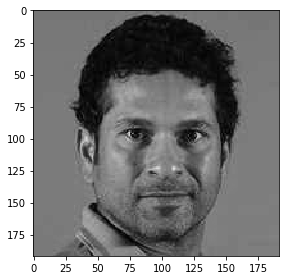

In [262]:
imshow(st_gray[4])

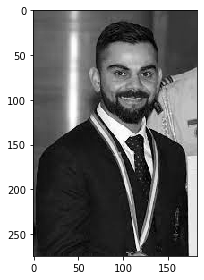

In [263]:
imshow(vk_gray[0])

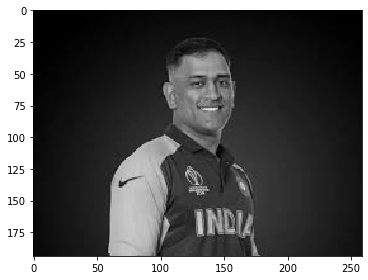

In [264]:
imshow(ms_gray[0])

In [265]:
st_gray[2].shape

(168, 300)

In [266]:
ms_gray[3].shape

(260, 194)

In [267]:
for j in range(10):
    ms_temp=ms_gray[j]
    ms_gray[j]=resize(ms_temp,(512,512))

In [268]:
for j in range(10):
    vk_temp=vk_gray[j]
    vk_gray[j]=resize(vk_temp,(512,512))

In [269]:
for j in range(10):
    st_temp=st_gray[j]
    st_gray[j]=resize(st_temp,(512,512))

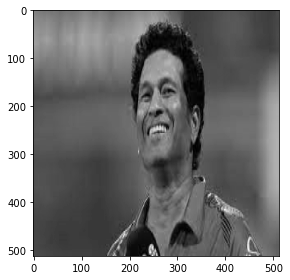

In [270]:
imshow(st_gray[2])

In [271]:
len_of_st=len(st_gray)
len_of_vk=len(vk_gray)
len_of_ms=len(ms_gray)

In [272]:
image_size_st=st_gray[1].shape
image_size_vk=vk_gray[1].shape
image_size_ms=ms_gray[1].shape

In [273]:
image_size_st

(512, 512)

In [274]:
flatten_size_st=image_size_st[0]*image_size_st[1]
flatten_size_vk=image_size_vk[0]*image_size_vk[1]
flatten_size_ms=image_size_ms[0]*image_size_ms[1]


In [275]:
flatten_size_ms

262144

In [276]:
for i in range(len_of_st):
    st_gray[i]= np.ndarray.flatten(st_gray[i].reshape(flatten_size_st,1))
for i in range(len_of_vk):
    vk_gray[i]= np.ndarray.flatten(vk_gray[i].reshape(flatten_size_vk,1))
for i in range(len_of_ms):
    ms_gray[i]= np.ndarray.flatten(ms_gray[i].reshape(flatten_size_ms,1))

In [277]:
st_gray=np.dstack(st_gray)
vk_gray=np.dstack(vk_gray)
ms_gray=np.dstack(ms_gray)

In [278]:
st_gray.shape

(1, 262144, 10)

In [279]:
st_gray=np.rollaxis(st_gray,axis=2,start=0)
vk_gray=np.rollaxis(vk_gray,axis=2,start=0)
ms_gray=np.rollaxis(ms_gray,axis=1,start=0)

In [280]:
vk_gray=np.rollaxis(vk_gray,axis=2,start=1)
st_gray=np.rollaxis(st_gray,axis=2,start=1)

In [281]:
vk_gray.shape

(10, 262144, 1)

In [282]:
st_gray=st_gray.reshape(len_of_st,flatten_size_st)
vk_gray=vk_gray.reshape(len_of_vk,flatten_size_vk)
ms_gray=ms_gray.reshape(len_of_ms,flatten_size_ms)

In [283]:
ms_gray.shape

(10, 262144)

In [284]:
st_data=pd.DataFrame(st_gray)
vk_data=pd.DataFrame(vk_gray)
ms_data=pd.DataFrame(ms_gray)

In [285]:
st_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,...,0.453823,0.453790,0.454389,0.461126,0.467864,0.475500,0.483209,0.490605,0.497899,0.496663
1,0.645559,0.644609,0.648056,0.651652,0.656822,0.661992,0.665764,0.669211,0.671476,0.672716,...,0.250358,0.232729,0.221461,0.217530,0.212209,0.200922,0.189635,0.192266,0.196217,0.195128
2,0.512676,0.512002,0.509705,0.509567,0.509031,0.506733,0.503657,0.499881,0.497317,0.495019,...,0.411179,0.410061,0.407086,0.394071,0.387216,0.387216,0.386625,0.385808,0.384282,0.383834
3,0.336398,0.337419,0.336447,0.335427,0.334406,0.331590,0.328636,0.325682,0.323633,0.321706,...,0.389070,0.388803,0.388569,0.388569,0.388569,0.388569,0.388569,0.388569,0.388569,0.388569
4,0.460408,0.460408,0.460408,0.460408,0.460408,0.460408,0.460408,0.460408,0.460408,0.460408,...,0.493753,0.493753,0.493753,0.493753,0.493753,0.493753,0.493753,0.493753,0.493753,0.493753
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.105307,0.112155,0.115738,0.115556,0.116386,0.121555,0.126724,0.096760,0.063461,0.072637
6,0.796004,0.796004,0.796004,0.796004,0.796004,0.796004,0.796004,0.796004,0.796004,0.796004,...,0.222132,0.231050,0.216701,0.202352,0.206693,0.222278,0.230319,0.202715,0.175110,0.187526
7,0.386351,0.392927,0.414919,0.447586,0.479187,0.505781,0.518650,0.520131,0.504765,0.484761,...,0.757878,0.757878,0.757878,0.757878,0.757878,0.757878,0.757878,0.757878,0.757878,0.757878
8,0.275287,0.275332,0.276316,0.276496,0.276065,0.275883,0.275858,0.275944,0.276088,0.276490,...,0.232886,0.237132,0.245275,0.253106,0.260331,0.266050,0.269368,0.271525,0.272150,0.272179
9,0.510781,0.509576,0.513948,0.518736,0.527909,0.537082,0.545922,0.554684,0.561515,0.566670,...,0.942315,0.942315,0.942315,0.942315,0.942406,0.942889,0.943372,0.941614,0.939643,0.940186


In [286]:
vk_data["label"]="virat"
ms_data["label"]="dhoni"
st_data["label"]="sachin"

In [287]:
vk_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.347989,0.347989,0.347989,0.347989,0.347989,0.347989,0.347989,0.347989,0.347989,0.347989,...,0.897011,0.897011,0.897011,0.897011,0.897011,0.896035,0.894633,0.893232,0.894350,virat
1,0.392737,0.392737,0.392737,0.392737,0.392737,0.392737,0.392737,0.392737,0.392737,0.392737,...,0.445968,0.437680,0.375083,0.331115,0.367146,0.403178,0.371944,0.334327,0.344693,virat
2,0.979000,0.979000,0.979000,0.979000,0.979000,0.979000,0.979000,0.979000,0.979000,0.979000,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,virat
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.511247,0.569696,0.647482,0.722031,0.782678,0.843325,0.802844,0.752768,0.766566,virat
4,0.450557,0.450463,0.449787,0.449487,0.449343,0.448112,0.446683,0.446894,0.446912,0.445338,...,0.380794,0.393049,0.405977,0.409577,0.412620,0.412620,0.412620,0.412620,0.412620,virat
5,0.337835,0.337835,0.337835,0.337835,0.337835,0.337835,0.337835,0.337835,0.337835,0.337835,...,0.295247,0.294686,0.296614,0.298668,0.303648,0.308629,0.312305,0.315704,0.314968,virat
6,0.099854,0.099854,0.099854,0.099854,0.099854,0.099854,0.099854,0.099854,0.099854,0.099854,...,0.957284,0.958509,0.959735,0.960960,0.962264,0.963750,0.965236,0.966424,0.964938,virat
7,0.826889,0.825755,0.827567,0.829379,0.831806,0.834713,0.837620,0.837435,0.837039,0.834784,...,0.827873,0.739937,0.656680,0.641744,0.626808,0.627847,0.649344,0.670842,0.657392,virat
8,0.900073,0.900073,0.900073,0.900073,0.900073,0.899310,0.897942,0.897011,0.896395,0.895325,...,0.426662,0.427938,0.430382,0.434447,0.436715,0.436715,0.437638,0.439622,0.439668,virat
9,0.388072,0.386877,0.382358,0.375138,0.367729,0.360950,0.355453,0.351686,0.351558,0.353065,...,0.157636,0.157636,0.157636,0.157636,0.157636,0.157636,0.157636,0.157636,0.157636,virat


In [288]:
img_1=pd.concat([st_data,vk_data])

In [289]:
img=pd.concat([img_1,ms_data])

In [290]:
img

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,...,0.453790,0.454389,0.461126,0.467864,0.475500,0.483209,0.490605,0.497899,0.496663,sachin
1,0.645559,0.644609,0.648056,0.651652,0.656822,0.661992,0.665764,0.669211,0.671476,0.672716,...,0.232729,0.221461,0.217530,0.212209,0.200922,0.189635,0.192266,0.196217,0.195128,sachin
2,0.512676,0.512002,0.509705,0.509567,0.509031,0.506733,0.503657,0.499881,0.497317,0.495019,...,0.410061,0.407086,0.394071,0.387216,0.387216,0.386625,0.385808,0.384282,0.383834,sachin
3,0.336398,0.337419,0.336447,0.335427,0.334406,0.331590,0.328636,0.325682,0.323633,0.321706,...,0.388803,0.388569,0.388569,0.388569,0.388569,0.388569,0.388569,0.388569,0.388569,sachin
4,0.460408,0.460408,0.460408,0.460408,0.460408,0.460408,0.460408,0.460408,0.460408,0.460408,...,0.493753,0.493753,0.493753,0.493753,0.493753,0.493753,0.493753,0.493753,0.493753,sachin
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.112155,0.115738,0.115556,0.116386,0.121555,0.126724,0.096760,0.063461,0.072637,sachin
6,0.796004,0.796004,0.796004,0.796004,0.796004,0.796004,0.796004,0.796004,0.796004,0.796004,...,0.231050,0.216701,0.202352,0.206693,0.222278,0.230319,0.202715,0.175110,0.187526,sachin
7,0.386351,0.392927,0.414919,0.447586,0.479187,0.505781,0.518650,0.520131,0.504765,0.484761,...,0.757878,0.757878,0.757878,0.757878,0.757878,0.757878,0.757878,0.757878,0.757878,sachin
8,0.275287,0.275332,0.276316,0.276496,0.276065,0.275883,0.275858,0.275944,0.276088,0.276490,...,0.237132,0.245275,0.253106,0.260331,0.266050,0.269368,0.271525,0.272150,0.272179,sachin
9,0.510781,0.509576,0.513948,0.518736,0.527909,0.537082,0.545922,0.554684,0.561515,0.566670,...,0.942315,0.942315,0.942315,0.942406,0.942889,0.943372,0.941614,0.939643,0.940186,sachin


In [291]:
from sklearn.utils import shuffle

In [292]:
img_shuffle = shuffle(img).reset_index()

In [293]:
img_shuffle

,index,0,1,2,3,4,5,6,7,8,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,2,0.969304,0.302894,0.082689,0.725414,0.112229,0.426526,0.020406,0.408575,0.441176,...,0.160240,0.451464,0.081575,0.172628,0.907346,0.374850,0.045238,0.455702,0.551354,dhoni
1,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.511247,0.569696,0.647482,0.722031,0.782678,0.843325,0.802844,0.752768,0.766566,virat
2,5,0.337835,0.337835,0.337835,0.337835,0.337835,0.337835,0.337835,0.337835,0.337835,...,0.295247,0.294686,0.296614,0.298668,0.303648,0.308629,0.312305,0.315704,0.314968,virat
3,9,0.388072,0.386877,0.382358,0.375138,0.367729,0.360950,0.355453,0.351686,0.351558,...,0.157636,0.157636,0.157636,0.157636,0.157636,0.157636,0.157636,0.157636,0.157636,virat
4,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.112155,0.115738,0.115556,0.116386,0.121555,0.126724,0.096760,0.063461,0.072637,sachin
5,1,0.592216,0.168835,0.668153,0.772155,0.549522,0.098602,0.019661,0.907651,0.996384,...,0.300871,0.086275,0.721487,0.102331,0.355842,0.033065,0.396692,0.474795,0.321532,dhoni
6,8,0.275287,0.275332,0.276316,0.276496,0.276065,0.275883,0.275858,0.275944,0.276088,...,0.237132,0.245275,0.253106,0.260331,0.266050,0.269368,0.271525,0.272150,0.272179,sachin
7,4,0.450557,0.450463,0.449787,0.449487,0.449343,0.448112,0.446683,0.446894,0.446912,...,0.380794,0.393049,0.405977,0.409577,0.412620,0.412620,0.412620,0.412620,0.412620,virat
8,8,0.900073,0.900073,0.900073,0.900073,0.900073,0.899310,0.897942,0.897011,0.896395,...,0.426662,0.427938,0.430382,0.434447,0.436715,0.436715,0.437638,0.439622,0.439668,virat
9,3,0.459934,0.136973,0.458225,0.069999,0.101224,0.905084,0.373448,0.046918,0.476877,...,0.951302,0.571178,0.056529,0.113695,0.570613,0.996078,0.975157,0.563837,0.154031,dhoni


In [294]:
img_shuffle=img_shuffle.drop(['index'],axis=1)

In [295]:
img_shuffle

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.969304,0.302894,0.082689,0.725414,0.112229,0.426526,0.020406,0.408575,0.441176,0.353155,...,0.160240,0.451464,0.081575,0.172628,0.907346,0.374850,0.045238,0.455702,0.551354,dhoni
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.511247,0.569696,0.647482,0.722031,0.782678,0.843325,0.802844,0.752768,0.766566,virat
2,0.337835,0.337835,0.337835,0.337835,0.337835,0.337835,0.337835,0.337835,0.337835,0.337835,...,0.295247,0.294686,0.296614,0.298668,0.303648,0.308629,0.312305,0.315704,0.314968,virat
3,0.388072,0.386877,0.382358,0.375138,0.367729,0.360950,0.355453,0.351686,0.351558,0.353065,...,0.157636,0.157636,0.157636,0.157636,0.157636,0.157636,0.157636,0.157636,0.157636,virat
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.112155,0.115738,0.115556,0.116386,0.121555,0.126724,0.096760,0.063461,0.072637,sachin
5,0.592216,0.168835,0.668153,0.772155,0.549522,0.098602,0.019661,0.907651,0.996384,0.887747,...,0.300871,0.086275,0.721487,0.102331,0.355842,0.033065,0.396692,0.474795,0.321532,dhoni
6,0.275287,0.275332,0.276316,0.276496,0.276065,0.275883,0.275858,0.275944,0.276088,0.276490,...,0.237132,0.245275,0.253106,0.260331,0.266050,0.269368,0.271525,0.272150,0.272179,sachin
7,0.450557,0.450463,0.449787,0.449487,0.449343,0.448112,0.446683,0.446894,0.446912,0.445338,...,0.380794,0.393049,0.405977,0.409577,0.412620,0.412620,0.412620,0.412620,0.412620,virat
8,0.900073,0.900073,0.900073,0.900073,0.900073,0.899310,0.897942,0.897011,0.896395,0.895325,...,0.426662,0.427938,0.430382,0.434447,0.436715,0.436715,0.437638,0.439622,0.439668,virat
9,0.459934,0.136973,0.458225,0.069999,0.101224,0.905084,0.373448,0.046918,0.476877,0.557955,...,0.951302,0.571178,0.056529,0.113695,0.570613,0.996078,0.975157,0.563837,0.154031,dhoni


In [296]:
img_shuffle.shape

(30, 262145)

In [297]:
x = img_shuffle.values[:,:-1]

In [298]:
y= img_shuffle.values[:,-1]

In [299]:
x

array([[0.9693041755014307, 0.30289411669263655, 0.08268858217725567,
        ..., 0.04523804840686274, 0.4557019722515928, 0.5513537197831098],
       [1.0, 1.0, 1.0, ..., 0.8028440717274535, 0.7527675996694378,
        0.7665664497476468],
       [0.33783529411764707, 0.337835294117647, 0.33783529411764707, ...,
        0.3123048927165013, 0.3157040681360282, 0.3149683158807194],
       ...,
       [0.9268707036156747, 0.9225712837009805, 0.207194628756654, ...,
        0.5600693556149801, 0.6361893259803921, 0.21014200283873316],
       [0.9790003921568629, 0.9790003921568629, 0.9790003921568629, ...,
        0.996078431372549, 0.996078431372549, 0.996078431372549],
       [0.2241396396292892, 0.24971547758214613, 0.5647348186021692, ...,
        0.13440069865208049, 0.22120157551709344, 0.5635236105645871]],
      dtype=object)

In [300]:
y

array(['dhoni', 'virat', 'virat', 'virat', 'sachin', 'dhoni', 'sachin',
       'virat', 'virat', 'dhoni', 'sachin', 'sachin', 'dhoni', 'sachin',
       'sachin', 'dhoni', 'virat', 'dhoni', 'virat', 'sachin', 'virat',
       'sachin', 'sachin', 'sachin', 'dhoni', 'virat', 'dhoni', 'dhoni',
       'virat', 'dhoni'], dtype=object)

In [301]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.18,random_state=0)

In [302]:
from sklearn import svm


In [303]:
clf=svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [304]:
y_pred=clf.predict(x_test)

In [305]:
y_pred

array(['sachin', 'dhoni', 'sachin', 'virat', 'dhoni', 'dhoni'],
      dtype=object)

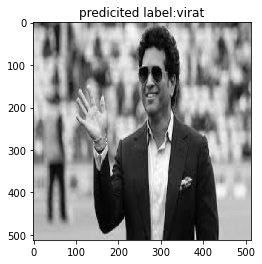

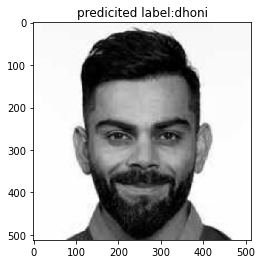

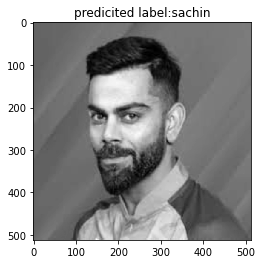

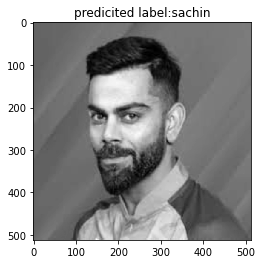

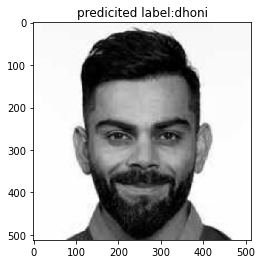

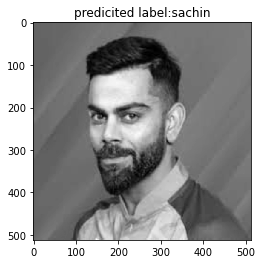

In [306]:
for i in (np.random.randint(0,4,6)):
    predicted_images = (np.reshape(x_test[i],(512,512)).astype(np.float64))
    plt.title('predicited label:{0}'.format(y_pred[i]))
    plt.imshow(predicted_images,interpolation='nearest',cmap='gray')
    plt.show()

In [307]:
from sklearn import metrics

In [308]:
accuracy=metrics.accuracy_score(y_test,y_pred)

In [309]:
accuracy

0.5

In [311]:
from sklearn.metrics import confusion_matrix

In [312]:
confusion_matrix(y_test,y_pred)

array([[2, 0, 0],
       [0, 1, 1],
       [1, 1, 0]], dtype=int64)